In [0]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [4]:
# Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

W0730 05:48:40.543575 139659037157248 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0730 05:48:40.561131 139659037157248 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0730 05:48:40.565851 139659037157248 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0730 05:48:40.583166 139659037157248 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0730 05:48:40.639647 139659037157248 deprecation_wrapp

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Part 2 - Fitting the CNN to the images
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/gdrive/My Drive/projects/web classification/image_data/training_set',
target_size = (64, 64),
batch_size = 32,
class_mode = 'binary')
test_set = test_datagen.flow_from_directory('/content/gdrive/My Drive/projects/web classification/image_data/test_set',
target_size = (64, 64),
batch_size = 32,
class_mode = 'binary')
classifier.fit_generator(training_set,
steps_per_epoch = 2500,
epochs = 10,
validation_data = test_set,
validation_steps = 100)


Found 4882 images belonging to 2 classes.
Found 195 images belonging to 2 classes.
Epoch 1/10
   6/2500 [..............................] - ETA: 19:30 - loss: 0.6048 - acc: 0.6927

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


2500/2500 [==============================] - 826s 330ms/step - loss: 0.2208 - acc: 0.9103 - val_loss: 0.4461 - val_acc: 0.8976
Epoch 2/10
2500/2500 [==============================] - 824s 330ms/step - loss: 0.0613 - acc: 0.9782 - val_loss: 0.8851 - val_acc: 0.8808
Epoch 3/10
2500/2500 [==============================] - 809s 324ms/step - loss: 0.0274 - acc: 0.9908 - val_loss: 0.5556 - val_acc: 0.9288
Epoch 4/10
2500/2500 [==============================] - 801s 321ms/step - loss: 0.0199 - acc: 0.9936 - val_loss: 0.5504 - val_acc: 0.9179
Epoch 5/10
2500/2500 [==============================] - 819s 328ms/step - loss: 0.0132 - acc: 0.9959 - val_loss: 0.8087 - val_acc: 0.9130
Epoch 6/10
2500/2500 [==============================] - 817s 327ms/step - loss: 0.0121 - acc: 0.9962 - val_loss: 0.7786 - val_acc: 0.8926
Epoch 7/10
2500/2500 [==============================] - 814s 326ms/step - loss: 0.0102 - acc: 0.9966 - val_loss: 0.5499 - val_acc: 0.9429
Epoch 8/10
2500/2500 [=======================

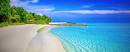

normal


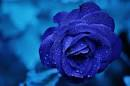

gamble


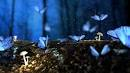

gamble


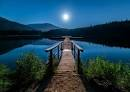

gamble


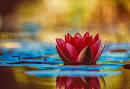

gamble


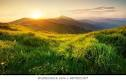

gamble


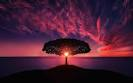

gamble


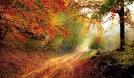

gamble


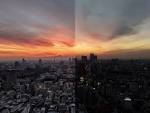

gamble


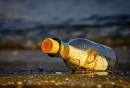

gamble


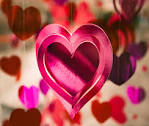

normal


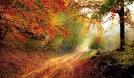

gamble


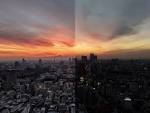

gamble


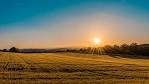

gamble


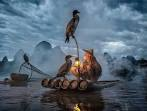

gamble


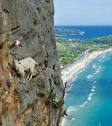

gamble


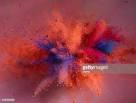

gamble


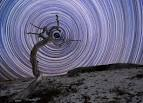

normal


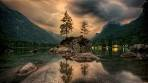

gamble


In [22]:
# Part 3 - Making new predictions
import numpy as np
import cv2
from google.colab.patches import cv2_imshow


from keras.preprocessing import image
for i in range(1,20):
  path = '/content/gdrive/My Drive/projects/web classification/image_data/test_img/normal/byeongwoo_' + str(i) +'.jpg'
  test_image = image.load_img(path, target_size = (64, 64))
  img = cv2.imread(path)
  cv2_imshow(img)
  test_image = image.img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis = 0)
  result = classifier.predict(test_image)
  training_set.class_indices
  if result[0][0] == 1:
    prediction = 'normal'
  else:
    prediction = 'gamble'
  print(prediction)